# Практическое задание

## Введение в искусственные нейронные сети
## Урок 2. Keras

## Домашнее задание <a class='anchor' id='hw'>

Используем набор примеров fashion-MNIST
1. Опишите - какой результат нейросети получен в зависимости от:
  - числа нейронов в слое (для 2-х слойной сети),
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

4. Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность).

### 1. Импорт библиотек и модулей 

In [1]:
import pandas as pd

# визуализация
import matplotlib.pyplot as plt

# математика
import numpy as np

# для создания комбинация числа нейронов сркытых слоев
from itertools import combinations, combinations_with_replacement

# датасет 
from keras.datasets import fashion_mnist

# создание модели нейронной сети 
from keras.layers import Dense       # Полносвязный линейный слой
from keras.models import Sequential  # Класс последовательности слоев

from keras.utils import to_categorical

# оптимизаторы
from keras import optimizers

# для построения матрицы ошибок
from sklearn.metrics import confusion_matrix

# визуализация нейронной сети 
# from keras.utils.vis_utils import plot_model

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train_labels.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,)


анализ содержимого:

1. X_train содержит 60 000 изображений размером 28 х 28
2. X_test датасет содержит 10 000 изображений размером 28 х 28
3. y_train_labels содержит 60 000 меток

Label is 4


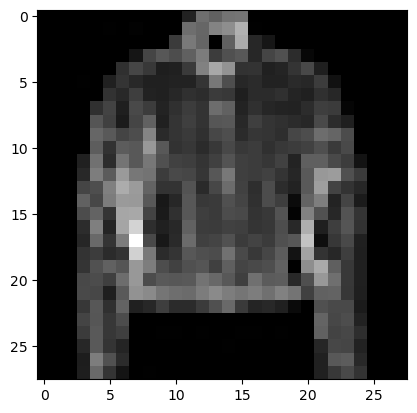

In [4]:
ind = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[ind], cmap='gray')
print(f'Label is {y_train_labels[ind]}')

### 2. Нормировка

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.min(), X_train.max()

(0.0, 1.0)

### 3. Reshape

In [6]:
v = np.array([x for x in range(100)])
v.reshape(1,100)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
        48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
        64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
        80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95,
        96, 97, 98, 99]])

In [7]:
# Вытягивание признаков
X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [8]:
v = X_train[0].copy()
v[v > 0] = 1
v = v.astype(np.int16)

### 4. Создание модели на Keras 

#### 4.1. Инициализация гиперпараметров

In [9]:
# число нейронов скрытого слоя
# возьмем как значения 2 в степенях от 5 до 9 - 32, 64, 128, 256

# список для хранения числа нейронов скрытого слоя 
neuron_numb = []

n = 2
for i in range(5, 9): 
    neuron_numb.append(n**i)

neuron_numb

[32, 64, 128, 256]

In [10]:
# список числа слоев 
layers_numb = [2, 3, 5, 10] 

In [11]:
# список для сохранения результатов
list_metris_total_neural_network_two_layers = []

# список наименований столбцов
list_cols = ['one_l_numb', 'second_l_numb', 'layers_numb', 'accuracy']

#### 4.2. Построение 2-х слойной нейронной сети

In [12]:
# создадим комбинации числа нейронов скрытого слоя из списка neuron_numb

comb_neuron_numb_dict = {}

comb_neuron_numb = combinations(neuron_numb, 2)
for i in list(comb_neuron_numb):
    name_set_params_nn = 'neuron_numb,' + ' one_l = ' + f'{i[0]},' + ' second_l = ' + f'{i[1]}'
    comb_neuron_numb_dict[name_set_params_nn] = i
print(comb_neuron_numb_dict)
len(comb_neuron_numb_dict)

{'neuron_numb, one_l = 32, second_l = 64': (32, 64), 'neuron_numb, one_l = 32, second_l = 128': (32, 128), 'neuron_numb, one_l = 32, second_l = 256': (32, 256), 'neuron_numb, one_l = 64, second_l = 128': (64, 128), 'neuron_numb, one_l = 64, second_l = 256': (64, 256), 'neuron_numb, one_l = 128, second_l = 256': (128, 256)}


6

In [13]:
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [14]:
# функция для получения двухслойной нейронной сети

def learning_neural_network_two_layers(X_train, y_train, X_test, y_test, **kwargs):
    
    l_nn = kwargs.get(k) # зачения количества нейроной первого и второго скрытого слоя
    one_l_numb = l_nn[0] # количество нейронов для первого скрытого слоя 
    second_l_numb = l_nn[1] # количество нейронов для второго скрытого слоя 

    model_two_layers = Sequential()
    
    model_two_layers.add(Dense(one_l_numb, input_shape=(28 * 28,), activation='relu')) # input-слой + первый скрытый слой
    model_two_layers.add(Dense(second_l_numb, activation='relu')) # второй скрытый слой
    
    model_two_layers.add(Dense(10, activation='sigmoid')) # output-слой

    # компиляция модели 
    model_two_layers.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    
    history = model_two_layers.fit(X_train, y_train,
                    epochs=5,
                    batch_size=256,
                    verbose=0,
                    validation_data=(X_test, y_test)
                    )
    
    best_metrics_model_two_layers = round(float(history.history['accuracy'][4])*100, 2) # значений accuracy последней эпохи
    list_total = []
    list_total.append(one_l_numb) # количество нейронов в первом скрытом слое
    list_total.append(second_l_numb) # количество нейронов во втором скрытом слое
    list_total.append(2) # количество слоев нейронной сети 
    list_total.append(best_metrics_model_two_layers) # значение accuracy
                                          
    list_metris_total_neural_network_two_layers.append(list_total)
    
# model.summary()

In [15]:
%%time

for k in comb_neuron_numb_dict:
    learning_neural_network_two_layers(X_train=X_train, 
                              y_train=y_train, 
                              X_test=X_test, 
                              y_test=y_test, 
                              **comb_neuron_numb_dict)

CPU times: total: 39.8 s
Wall time: 16 s


In [16]:
# сформируем датасет из списков, включающих значения о количестве нейронов в первом и втором скрытых слоях и метрику - accuracy 
data_neural_network_two_layers = pd.DataFrame(list_metris_total_neural_network_two_layers, columns=list_cols)
# отсортируем полученные данные по столбцу точность нейронной сети(accuracy)
data_neural_network_two_layers.sort_values(by=list_cols[3], ascending=False)

,one_l_numb,second_l_numb,layers_numb,accuracy
5,128,256,2,80.60
3,64,128,2,79.61
4,64,256,2,78.95
0,32,64,2,78.41
1,32,128,2,78.37
2,32,256,2,77.56


Вывод: Увеличение accuracy зависит как от увеличения количества нейронов первого скрытого слоя, так и второго

### 4.3. Построение нейронной сети с различными количествами скрытых слоев

In [17]:
# создадим комбинации числа нейронов скрытого слоя из списка neuron_numb для разного количества слоев 

comb_neuron_numb_dict_some_layes = {}

n = 1
for el in layers_numb:
    comb_neuron_numb_layes = combinations_with_replacement(neuron_numb, el)
    for i in list(comb_neuron_numb_layes):
#         print(i)
        comb_neuron_numb_dict_some_layes[str(i)] = i
        
        
# print(comb_neuron_numb_dict_some_layes)

# for k in comb_neuron_numb_dict_some_layes:
#     print(len(comb_neuron_numb_dict_some_layes.get(k)))

In [18]:
# список для сохранения результатов
list_metris_total_neural_network_some_layers = []

# список наименований столбцов
list_cols = ['neuron_numb_for_layers', 'layers_numb', 'accuracy']

In [19]:
# функция для получения нейронной сети с различным количеством слоев 

def learning_neural_network_some_layers(X_train, y_train, X_test, y_test, layers_numb, **kwargs):    
    model_some_layers = Sequential()

    l_nn = kwargs.get(k)
    model_some_layers.add(Dense(l_nn[0], input_shape=(28 * 28,), activation='relu')) # input-слой + первый скрытый слой
    
           
    for i in range(1, n+1): # для кажого слоя в диапазоне от 2-х до ... заданного
        model_some_layers.add(Dense(l_nn[n], activation='relu')) # остальные скрытые слои

   
    model_some_layers.add(Dense(10, activation='sigmoid')) # output-слой

    # компиляция модели 
    model_some_layers.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    
    history = model_some_layers.fit(X_train, y_train,
                    epochs=5,
                    batch_size=256,
                    verbose=0,
                    validation_data=(X_test, y_test)
                    )
    
    best_metrics_model_some_layers = round(float(history.history['accuracy'][4])*100, 2) # значений accuracy последней эпохи
#     print(best_metrics_model_some_layers)
    list_total = []
    list_total.append(l_nn) # количество нейронов по слоям 
    list_total.append(layers_numb) # количество слоев нейронной сети 
    list_total.append(best_metrics_model_some_layers) # значение accuracy
                                          
    list_metris_total_neural_network_some_layers.append(list_total)
    
# model.summary()

In [20]:
%%time

for k in comb_neuron_numb_dict_some_layes:
    learning_neural_network_some_layers(X_train=X_train, 
                              y_train=y_train, 
                              X_test=X_test, 
                              y_test=y_test, 
                              layers_numb=int(len(comb_neuron_numb_dict_some_layes.get(k))),  
                              **comb_neuron_numb_dict_some_layes)

CPU times: total: 38min 17s
Wall time: 16min 58s


In [21]:
# сформируем датасет из списков, включающих значения о количестве нейронов в каждом слое и метрику - accuracy 
data_neural_network_some_layers = pd.DataFrame(list_metris_total_neural_network_some_layers, columns=list_cols)
# отсортируем полученные данные по столбцу точность нейронной сети(accuracy)
data_neural_network_some_layers.sort_values(by=list_cols[2], ascending=False)

,neuron_numb_for_layers,layers_numb,accuracy
85,"(256, 256, 256, 256, 256)",5,81.59
371,"(256, 256, 256, 256, 256, 256, 256, 256, 256, ...",10,81.37
9,"(256, 256)",2,81.34
367,"(128, 128, 128, 128, 256, 256, 256, 256, 256, ...",10,81.20
29,"(256, 256, 256)",3,81.02
...,...,...,...
144,"(32, 32, 32, 32, 64, 64, 64, 64, 64, 256)",10,75.61
117,"(32, 32, 32, 32, 32, 32, 128, 128, 128, 256)",10,75.30
134,"(32, 32, 32, 32, 32, 64, 128, 256, 256, 256)",10,75.07
109,"(32, 32, 32, 32, 32, 32, 64, 64, 128, 128)",10,74.87


Вывод: Увеличение количества слоев не всегда приводит к лучшему результату. Имеет значение и количество нейронов в каждом слое. Так максимальное значение accuracy (81.59) при заданных параметрах было получено при 5-ти слоях по 256 нейронов в каждом.
Несколько уступала модель в 10 слоев по 256 нейронов в каждом (accuracy = 81.37)

лучшая нейронная сеть по accuracy

In [23]:
%%time

model_some_layers = Sequential()

model_some_layers.add(Dense(256, input_shape=(28 * 28,), activation='relu')) # input-слой + первый скрытый слой
model_some_layers.add(Dense(256, activation='relu'))
model_some_layers.add(Dense(256, activation='relu'))
model_some_layers.add(Dense(256, activation='relu')) 
model_some_layers.add(Dense(256, activation='relu')) 
model_some_layers.add(Dense(10, activation='sigmoid')) # output-слой

# компиляция модели 
model_some_layers.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

history = model_some_layers.fit(X_train, y_train,
                epochs=5,
                batch_size=256,
                verbose=0,
                validation_data=(X_test, y_test)
                )

best_metrics_model_some_layers = round(float(history.history['accuracy'][4])*100, 2) # значений accuracy последней эпохи
print(best_metrics_model_some_layers)

80.66
CPU times: total: 34.7 s
Wall time: 7.95 s


In [24]:
# Запишем конфиг лучшей нейронной сети в переменную
config = model_some_layers.get_config()

## 5. Оценка обученности нейронной сети

In [147]:
loss, metric = model_some_layers.evaluate(X_test, y_test, batch_size=128)
loss, metric

79/79 [==============================] - 0s 2ms/step - loss: 0.3632 - accuracy: 0.8744


(0.36322689056396484, 0.8744000196456909)

## 6. Запуск нейронной сети для выполнения работы

In [148]:
X_test[0][None].shape

(1, 784)

In [149]:
predictions = model_some_layers.predict(X_test[0][None])
predictions

1/1 [==============================] - 0s 18ms/step


array([[9.9617341e-07, 4.2306869e-10, 1.9246700e-06, 2.3428295e-07,
        1.2666808e-09, 5.2962790e-04, 5.9444332e-08, 1.1757028e-03,
        9.6342198e-08, 1.1234007e-01]], dtype=float32)

In [150]:
pred_labels = np.argmax(predictions, axis=1)
pred_labels

array([9], dtype=int64)

In [151]:
y_test_labels[:1]

array([9], dtype=uint8)

## 7. Сохранение модели

In [31]:
# Save the weights to disk
model_some_layers.save_weights('model_weights.h5')

# Save the model to disk
model_some_layers.save('model.h5')

In [32]:
config_mnist = model_some_layers.get_config()

## 8. Оптимизаторы

In [33]:
optimizers.SGD(learning_rate=0.001, momentum=0.5)

### AdaGrad

In [34]:
optimizers.Adagrad(learning_rate=0.001, initial_accumulator_value=0.1, epsilon=1e-07)

### RMSProp (Leaky AdaGrad)

In [35]:
optimizers.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-07)

### Adam

In [36]:
optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

Epoch 1/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5119 - accuracy: 0.8196 - val_loss: 0.5080 - val_accuracy: 0.8199
Epoch 2/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4282 - accuracy: 0.8465 - val_loss: 0.4369 - val_accuracy: 0.8439
Epoch 3/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3895 - accuracy: 0.8609 - val_loss: 0.4393 - val_accuracy: 0.8427
Epoch 4/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3629 - accuracy: 0.8696 - val_loss: 0.4178 - val_accuracy: 0.8487
Epoch 1/4
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3227 - accuracy: 0.8835 - val_loss: 0.3690 - val_accuracy: 0.8653
Epoch 2/4
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3139 - accuracy: 0.8857 - val_loss: 0.3673 - val_accuracy: 0.8671
Epoch 3/4
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3084 - accuracy: 0.8882 - val_loss: 0.3624 - val_accuracy: 0.8673

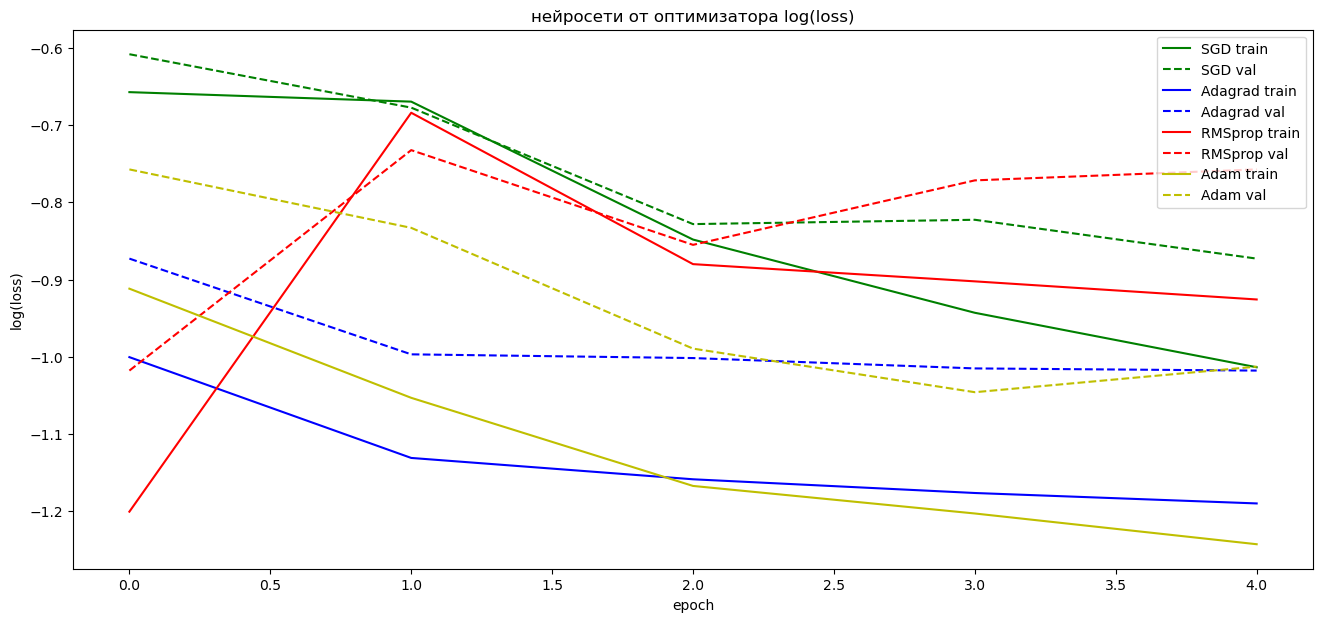

CPU times: total: 8min 8s
Wall time: 2min 28s


In [38]:
%%time

# будем сохранять модели в словарь
models = {}

plt.figure(figsize=(16, 7))
colors = ['g', 'b', 'r', 'y']

num_epochs = 4
batch_size = 32

# вектор для вывода результатов
epoch = np.arange(num_epochs+1)

# будем изменять оптимизаторы
for i, i_optim in enumerate([optimizers.SGD(),
                             optimizers.Adagrad(),
                             optimizers.RMSprop(),
                             optimizers.Adam()]):

    # создаем рабочую модель  model_i с зафиксированными весами
    import tensorflow as tf
    tf.random.set_seed(1)

    model_i = model_some_layers


    # компилируем model_i с одним из оптимизаторов
    model_i.compile(
        optimizer=i_optim,
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )

    # вычисляем ошибку для modeli без обучения
    h0_train = model_i.evaluate(X_train, y_train, verbose=0)
    h0_val = model_i.evaluate(X_test, y_test, verbose=0)

    # проводим обучение модели
    h = model_i.fit(X_train, y_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    verbose=1)

    # записываем обученную модель в словарь
    models[i_optim.get_config()['name']] = model_i

    # картинки
    plt.plot(epoch, np.log([h0_train[0]] + h.history['loss']),
             '-', c=colors[i],
             label=model_i.optimizer.get_config()['name'] + ' train')
    plt.plot(epoch, np.log([h0_val[0]] + h.history['val_loss']),
             '--', c=colors[i],
             label=model_i.optimizer.get_config()['name'] + ' val')
    print('=' * 20)

plt.legend()
plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

In [45]:
model_i.optimizer.get_config()

{'name': 'Adam',
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'jit_compile': False,
 'is_legacy_optimizer': False,
 'learning_rate': 0.001,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

1/1 [==============================] - 0s 56ms/step


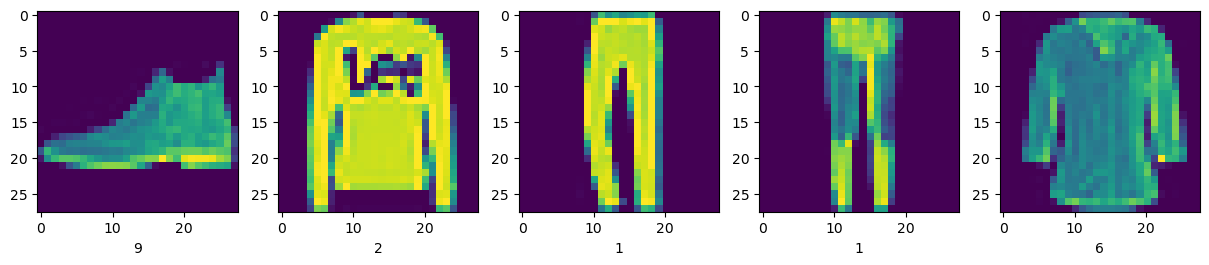

In [46]:
N = 5
y_pred = model_i.predict(X_test[:N, :])
y_pred_class = np.argmax(y_pred, axis=1)
plt.figure(figsize=(3 * N, 5))

for i in range(N):
    plt.subplot(1, N, i+1)
    plt.imshow(X_test[i,:].reshape(28, 28))
    plt.xlabel(str(y_pred_class[i]))
plt.show()

In [47]:
y_pred_class

array([9, 2, 1, 1, 6], dtype=int64)

In [160]:
y_pred = model_some_layers.predict(X_test)

result = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
result

313/313 [==============================] - 0s 1ms/step


array([[821,   4,  16,  61,   3,   0,  81,   0,  14,   0],
       [  0, 967,   1,  26,   3,   0,   2,   0,   1,   0],
       [  8,   4, 733,  27, 110,   0, 113,   0,   5,   0],
       [ 18,  14,   5, 909,  28,   0,  19,   0,   7,   0],
       [  0,   1,  76,  45, 800,   0,  66,   0,  12,   0],
       [  1,   0,   0,   1,   0, 938,   0,  24,   5,  31],
       [152,   3,  51,  43,  62,   0, 673,   0,  16,   0],
       [  0,   0,   0,   0,   0,   6,   0, 949,   0,  45],
       [  1,   1,   4,   3,   3,   1,   2,   2, 983,   0],
       [  0,   0,   0,   2,   0,   5,   1,  22,   0, 970]], dtype=int64)

In [161]:
m = tf.keras.metrics.Recall()
m.update_state(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(f'Recall: {m.result().numpy()}')

Recall: 0.9800000190734863


In [162]:
m = tf.keras.metrics.Precision()
m.update_state(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(f'Precision: {m.result().numpy()}')

Precision: 0.980108916759491


качество классификации улучшилось за счет уменьшения параметра learning_rate